In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

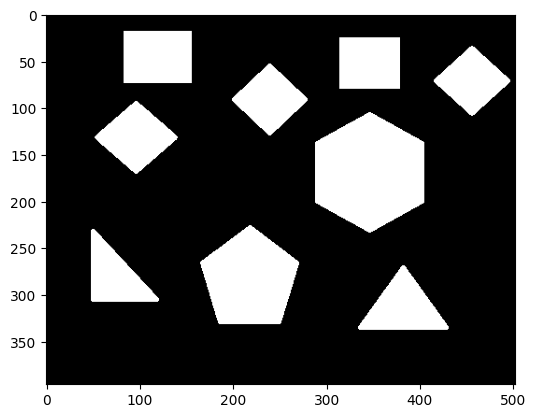

In [26]:
image_path = "/content/binary_image.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.show()

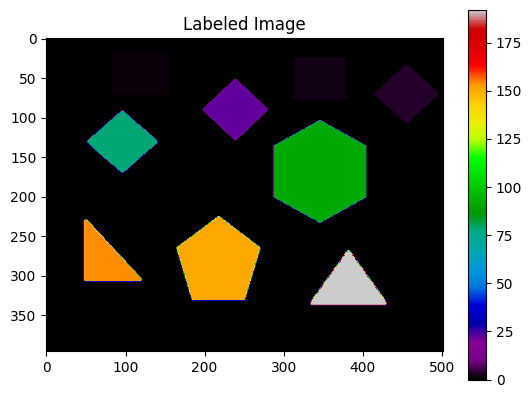

In [27]:
def sequential_labeling(image):
    height = len(image)
    width = len(image[0])
    current_label = 1  # Initialize label counter
    equivalence_table = {}  # Initialize empty equivalence table

    # First Raster Scan - Label Assignment
    for y in range(height):
        for x in range(width):
            A = image[y][x]  # Current pixel
            if A == 0:
                continue  # Skip background pixels

            # Get neighbor pixel values
            B = image[y-1][x] if y > 0 else 0  # Top neighbor
            C = image[y][x-1] if x > 0 else 0  # Left neighbor

            if B == 0 and C == 0:
                # All neighbors are background, assign new label
                image[y][x] = current_label
                equivalence_table[current_label] = current_label
                current_label += 1
            elif B != 0 and C != 0:
                # Both neighbors are labeled
                if B == C:
                    image[y][x] = B
                else:
                    # Assign the smaller label and record equivalence
                    min_label = min(B, C)
                    max_label = max(B, C)
                    image[y][x] = min_label
                    equivalence_table[max_label] = min(equivalence_table.get(max_label, max_label), min_label)
            elif B != 0:
                # Only the top neighbor is labeled
                image[y][x] = B
            else:  # C != 0
                # Only the left neighbor is labeled
                image[y][x] = C

    # Equivalence Resolution - Simplify the equivalence table
    for k in list(equivalence_table.keys()):
        while equivalence_table[k] != equivalence_table[equivalence_table[k]]:
            equivalence_table[k] = equivalence_table[equivalence_table[k]]

    # Second Raster Scan - Apply resolved labels
    for y in range(height):
        for x in range(width):
            A = image[y][x]  # Current pixel
            if A != 0:
                # Update pixel with its resolved label
                image[y][x] = equivalence_table.get(A, A)

    return image


# Load the image
image_path = "/content/binary_image.png"
binary_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Apply the sequential labeling algorithm
labeled_image = sequential_labeling(binary_image)

# Display the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.colorbar()
plt.title('Labeled Image')
plt.show()
